# Plot flow cytometry of delivery of Cre mRNA

# Introduction

## Imports

In [1]:
import sys
import os
import time

import numpy as np
import scipy
import pandas as pd

%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns

## Set output parameters

In [2]:
# Set pandas display options
pd.set_option('display.max_rows', 30)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)

# Set plot display options
FONTSIZE = 8  # universal fontsize
params = {
    'font.size': FONTSIZE,
    'axes.titlesize': FONTSIZE,
    'axes.labelsize': FONTSIZE,
    'legend.fontsize': FONTSIZE,
    'xtick.labelsize': FONTSIZE,
    'ytick.labelsize': FONTSIZE,
    'font.family': "Helvetica",
    'mathtext.fontset': 'custom',
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.dpi': 300
   }
mpl.rcParams.update(params)
sns.set_style("ticks", {'axes.grid' : False})

# Set plot output options
output_dir = "outs/flow_Cre"
output_suffix = ""
output_formats = [".png", ".pdf"]

mpl.rc('savefig', dpi=300)

# Define convenience function for saving figures

savefig = True
savefig_args = {"dpi": 300, "bbox_inches": "tight", "pad_inches": 0.1}

def save_figure(fig, name, output_dir=output_dir, output_suffix=output_suffix, output_formats=output_formats, savefig_args=savefig_args):
    if savefig:
        for output_format in output_formats:
            fig.savefig(output_dir + "/" + name + output_suffix + output_format, **savefig_args)
    return None

In [3]:
# Report plot parameters
sns.plotting_context()

{'font.size': 8.0,
 'axes.labelsize': 8.0,
 'axes.titlesize': 8.0,
 'xtick.labelsize': 8.0,
 'ytick.labelsize': 8.0,
 'legend.fontsize': 8.0,
 'legend.title_fontsize': None,
 'axes.linewidth': 0.8,
 'grid.linewidth': 0.8,
 'lines.linewidth': 1.5,
 'lines.markersize': 6.0,
 'patch.linewidth': 1.0,
 'xtick.major.width': 0.8,
 'ytick.major.width': 0.8,
 'xtick.minor.width': 0.6,
 'ytick.minor.width': 0.6,
 'xtick.major.size': 3.5,
 'ytick.major.size': 3.5,
 'xtick.minor.size': 2.0,
 'ytick.minor.size': 2.0}

# Load data

In [4]:
infile = "../preprocessed_data/flow_data/flow_Cre_summary.csv"

df_raw = pd.read_csv(infile, index_col=0)

print(df_raw.shape)
df_raw

(30, 16)


,Plate Number,Well Number,Condition Name,Exporter?,Cargo?,Export Tag?,Fusogen?,Total Ungated Events,Putative Cell Events,% Putative Cells in Total Events,Singlet Gated Events,% Singlets in Putative Cells,GFP-A Events in Singlet POI,% of GFP-A Events in Singlet POI,mCherry-A Events in GFP-A POI,% of mCherry-A Events in GFP-A POI
1,1,A2,allDNA_CreMS2,-,+,+,-,40000,24751,61.8775,24295,98.157650,23297,95.892159,57,0.244667
2,1,A3,allDNA_Cre,-,+,-,-,40000,24468,61.1700,24071,98.377473,23112,96.015953,50,0.216338
3,1,A4,allDNA_EPN24_CreMS2,+,+,+,-,40000,24407,61.0175,23876,97.824395,22967,96.192830,49,0.213350
4,1,A5,allDNA_EPN24_Cre,+,+,-,-,40000,24523,61.3075,24191,98.646169,23230,96.027448,63,0.271201
5,1,A6,allDNA_CreMS2_VSVG_50ng,-,+,+,+,40000,25326,63.3150,25077,99.016821,24113,96.155840,73,0.302741
6,1,A7,allDNA_Cre_VSVG_50ng,-,+,-,+,40000,24264,60.6600,23972,98.796571,22966,95.803437,114,0.496386
8,1,A9,allDNA_EPN24_CreMS2_VSVG_50ng,+,+,+,+,40000,23791,59.4775,23444,98.541465,22545,96.165330,10500,46.573520
9,1,A10,allDNA_EPN24_Cre_VSVG_50ng,+,+,-,+,40000,24651,61.6275,24366,98.843860,23418,96.109333,151,0.644803
11,1,A12,allDNA_Acacia_WT,-,-,-,-,40000,23081,57.7025,22867,99.072830,21977,96.107928,47,0.213860
13,1,B2,allDNA_CreMS2,-,+,+,-,40000,24828,62.0700,24535,98.819881,23552,95.993479,65,0.275985


# Plot delivery (activation of RFP-based Cre reporter in receiver cells)

In [5]:
conditions = ["allDNA_EPN24_CreMS2_VSVG_50ng",
              "allDNA_CreMS2_VSVG_50ng",
              "allDNA_EPN24_CreMS2",
              "allDNA_EPN24_Cre_VSVG_50ng",
              "allDNA_CreMS2",
              "allDNA_Cre_VSVG_50ng",
              "allDNA_EPN24_Cre",
              "allDNA_Cre",
              "allDNA_Acacia_WT",
              "allRNA_CreMS2_1000ng"]

selector = df_raw["Condition Name"].isin(conditions)
data = df_raw.loc[selector]

print(data.shape)
data.head()

(30, 16)


,Plate Number,Well Number,Condition Name,Exporter?,Cargo?,Export Tag?,Fusogen?,Total Ungated Events,Putative Cell Events,% Putative Cells in Total Events,Singlet Gated Events,% Singlets in Putative Cells,GFP-A Events in Singlet POI,% of GFP-A Events in Singlet POI,mCherry-A Events in GFP-A POI,% of mCherry-A Events in GFP-A POI
1,1,A2,allDNA_CreMS2,-,+,+,-,40000,24751,61.8775,24295,98.157650,23297,95.892159,57,0.244667
2,1,A3,allDNA_Cre,-,+,-,-,40000,24468,61.1700,24071,98.377473,23112,96.015953,50,0.216338
3,1,A4,allDNA_EPN24_CreMS2,+,+,+,-,40000,24407,61.0175,23876,97.824395,22967,96.192830,49,0.213350
4,1,A5,allDNA_EPN24_Cre,+,+,-,-,40000,24523,61.3075,24191,98.646169,23230,96.027448,63,0.271201
5,1,A6,allDNA_CreMS2_VSVG_50ng,-,+,+,+,40000,25326,63.3150,25077,99.016821,24113,96.155840,73,0.302741


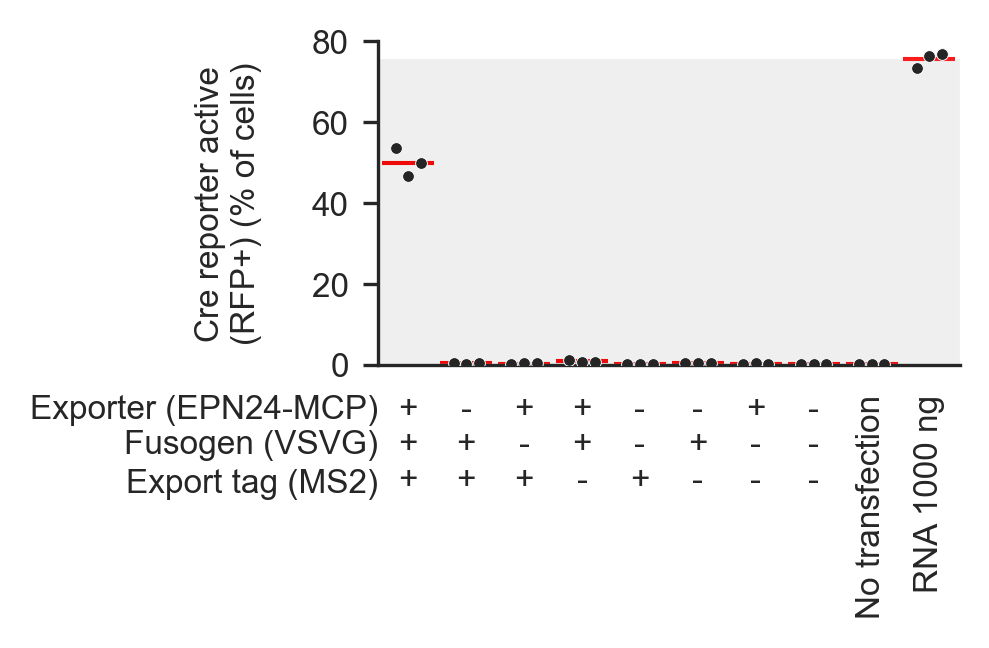

In [6]:
# Map conditions to x values
condition_to_x = dict(zip(conditions, range(len(conditions))))
data["x"] = data["Condition Name"].map(condition_to_x)

# Sort dataframe by x values
data = data.sort_values(by="x")

# Calculate summary statistic (mean)
summary = data.groupby("Condition Name").mean().reset_index()

# Create plot
fig, ax = plt.subplots(1, 1, figsize=(2.5,1.4))

# Plot summary
x = summary["x"]
y = summary["% of mCherry-A Events in GFP-A POI"]
sns.scatterplot(ax=ax, x=x, y=y, marker="_", s=150, color="r")

# Plot replicates
x = data["x"]
y = data["% of mCherry-A Events in GFP-A POI"]

offset = 0.22
x_offset = np.array([-offset, 0, offset])  # jitter offsets to avoid operlaps
x_swarm = x + np.tile(x_offset, int(len(x)/len(x_offset)))

sns.scatterplot(ax=ax, x=x_swarm, y=y, marker="o", s=8, color="#252525", zorder=10)

# Set axis limits
ax.set_ylim(0, 80)
ax.set_xlim(min(x_swarm) - 0.3, max(x_swarm) + 0.3)

# Set labels
ax.set_xlabel("")
# ax.set_ylabel("RFP positive cells (%)", labelpad=12)
ax.set_ylabel("Cre reporter active\n(RFP+) (% of cells)", labelpad=12)

# Set tick labels

ax.set_xticks(range(max(x)+1))

xticklabels = ["+\n+\n+",
               "-\n+\n+",
               "+\n-\n+",
               "+\n+\n-",
               "-\n-\n+",
               "-\n+\n-",
               "+\n-\n-",
               "-\n-\n-",
               "No transfection",
               "RNA 1000 ng"]
ax.set_xticklabels(xticklabels)

ticks = ax.get_xticklabels()
ticks[-1].set_rotation(90)
ticks[-2].set_rotation(90)

# Make tick label annotations
ax.text(0, -0.09, "Exporter (EPN24-MCP)", transform=ax.transAxes, ha="right", va="top", size=FONTSIZE)
ax.text(0, -0.20, "Fusogen (VSVG)", transform=ax.transAxes, ha="right", va="top", size=FONTSIZE)
ax.text(0, -0.32, "Export tag (MS2)", transform=ax.transAxes, ha="right", va="top", size=FONTSIZE)

# Make grey box
ymax_shade = summary.set_index("Condition Name").loc["allRNA_CreMS2_1000ng"]["% of mCherry-A Events in GFP-A POI"]
ax.axhspan(0, ymax_shade, facecolor="#666666", alpha=0.1)

# Set style
ax.tick_params(axis='x', which='both', bottom=False)  # remove xticks
sns.despine()

save_figure(fig, "line_swarm_Cre_delivery")

In [7]:
# Report values


# Map conditions to x values
condition_to_x = dict(zip(conditions, range(len(conditions))))
data["x"] = data["Condition Name"].map(condition_to_x)

# Sort dataframe by x values
data = data.sort_values(by="x")

# Calculate summary statistic (mean)
summary = data.groupby("Condition Name").mean().reset_index()

print("Mean")
print(summary["% of mCherry-A Events in GFP-A POI"])
print()

# STD
summary = data.groupby("Condition Name").std().reset_index()

print("STD")
print(summary["% of mCherry-A Events in GFP-A POI"])
print()


Mean
0     0.236980
1     0.236429
2     0.265204
3     0.329668
4     0.433678
5     0.272971
6     0.276256
7    50.003266
8     0.833433
9    75.600129
Name: % of mCherry-A Events in GFP-A POI, dtype: float64

STD
0    0.023736
1    0.019115
2    0.017794
3    0.050535
4    0.060579
5    0.036843
6    0.054533
7    3.507563
8    0.286570
9    1.886035
Name: % of mCherry-A Events in GFP-A POI, dtype: float64

